# Análisis exploratorio con seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml(name= 'titanic',version=1,as_frame=True)
titanic_df = pd.DataFrame(data=titanic['data'])
titanic_df.head()

c:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_df.shape, titanic_df.columns

((1309, 13),
 Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
        'cabin', 'embarked', 'boat', 'body', 'home.dest'],
       dtype='object'))

In [5]:
titanic_df.dtypes # Tipos de datos

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

In [6]:
numeric_features = titanic_df.select_dtypes(exclude='object')
print(numeric_features.shape)
categorical_features = titanic_df.select_dtypes(include='object')
print(categorical_features.shape)
print(categorical_features.columns)

(1309, 8)
(1309, 5)
Index(['name', 'ticket', 'cabin', 'boat', 'home.dest'], dtype='object')


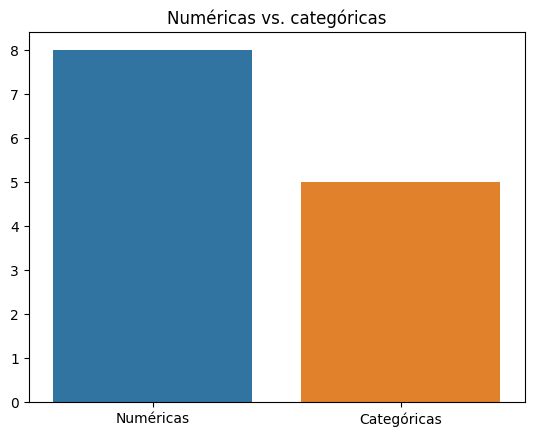

In [7]:
# Visualizar el ratio de variables numericas vs categóricas
# seaborn está basado en matplotlib

sns.barplot(x=['Numéricas','Categóricas'],y= [numeric_features.shape[1],categorical_features.shape[1]])
plt.title('Numéricas vs. categóricas')
plt.show()


In [8]:
# Verificación de los valores nulos
titanic_df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [9]:
titanic_df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
titanic_df['sex'].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

<BarContainer object of 2 artists>

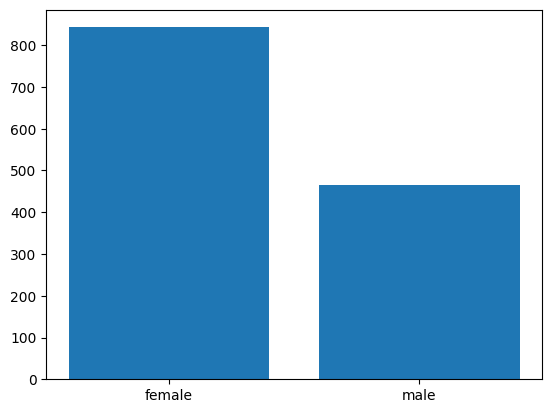

In [11]:
plt.bar(x=titanic_df['sex'].unique(),height= titanic_df['sex'].value_counts())

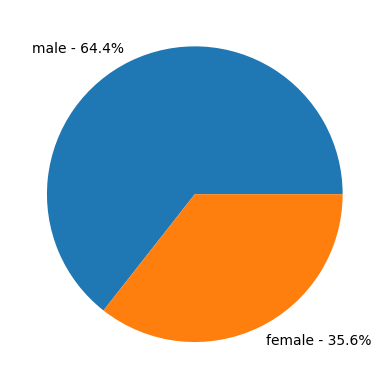

In [21]:
# Calcular las frecuencias relativas
relative_frequencies = titanic_df['sex'].value_counts(normalize=True)

# Calcular los porcentajes y formatearlos como etiquetas
labels = ['{} - {:.1f}%'.format(label, freq * 100) for label, freq in zip(relative_frequencies.index, relative_frequencies)]

# Crear un gráfico de pastel con las etiquetas de porcentaje
plt.pie(relative_frequencies, labels=labels)
plt.show()

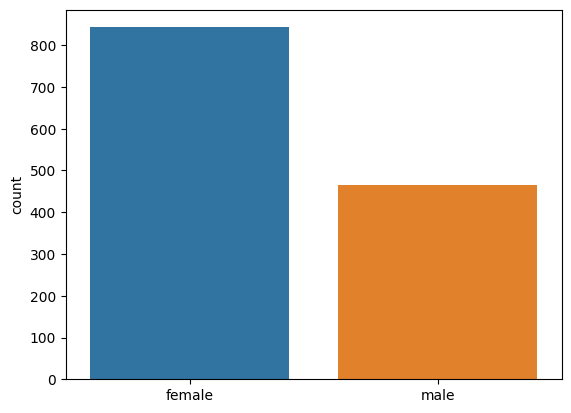

In [13]:
sns.barplot(x= titanic_df['sex'].unique(), y= titanic_df['sex'].value_counts())
plt.show()

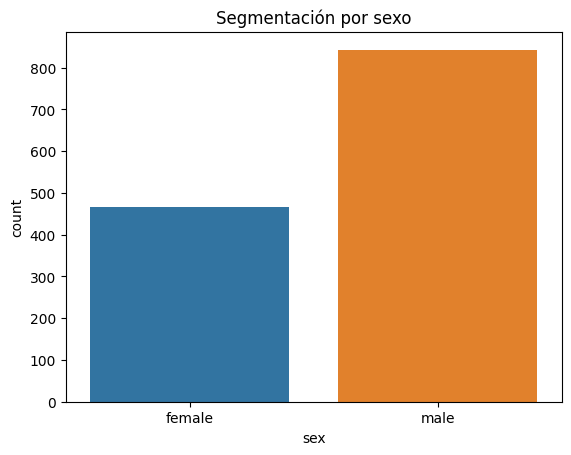

In [14]:
sns.countplot(data=titanic_df,x='sex')
plt.title('Segmentación por sexo')
plt.show()

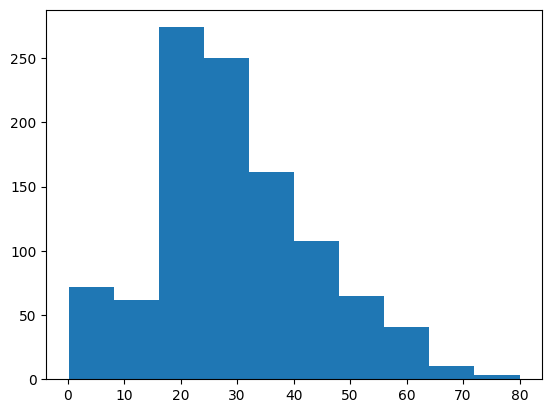

In [15]:
plt.hist(x=titanic_df['age']) #bins=23
plt.show()

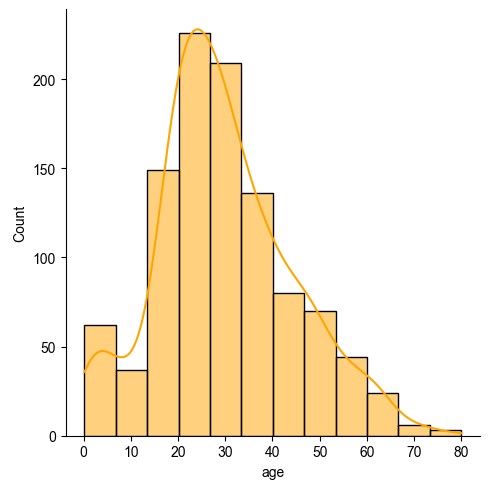

In [16]:
# Distribución de la edad
sns.displot(data=titanic_df,x = 'age',kde= True,color='orange', bins = 'sturges')
sns.set_style("darkgrid") #"darkgrid","whitegrid","dark","white","ticks"
plt.show()


In [17]:
titanic_df.dtypes

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

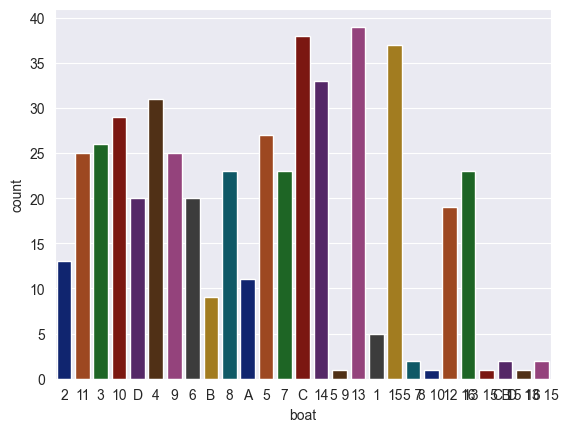

In [24]:
titanic_df['boat'].unique()
sns.countplot(data=titanic_df,x='boat',palette="dark") #"deep", "muted", "dark", "colorblind", "husl", "Set1", "Set2", "Set3"
plt.show()

# Relación entre variables

In [19]:
titanic_df.dtypes

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

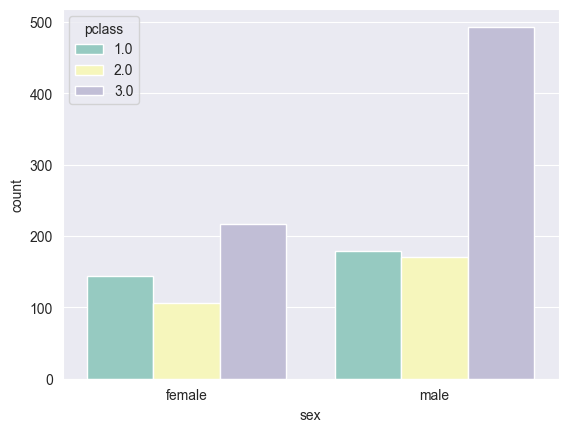

In [25]:
sns.countplot(data=titanic_df,x='sex',hue='pclass',palette="Set3")
plt.show()

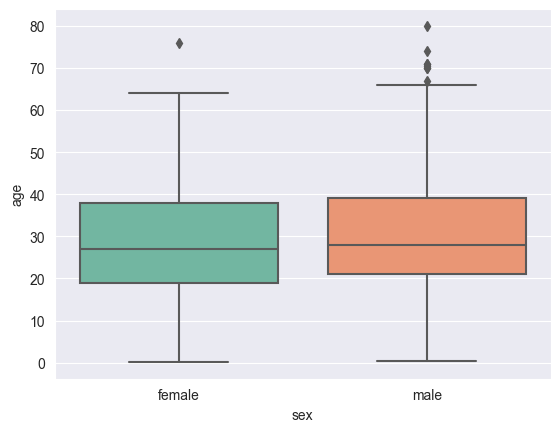

In [26]:
sns.boxplot(data=titanic_df, x='sex', y='age',palette="Set2")
plt.show()

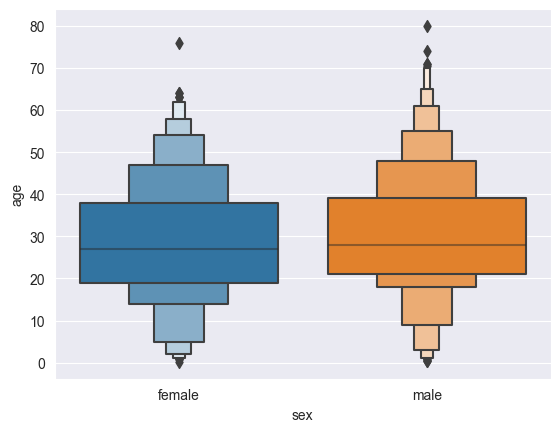

In [27]:
sns.boxenplot(data=titanic_df, x='sex', y='age')
plt.show()

<Axes: xlabel='sex', ylabel='age'>

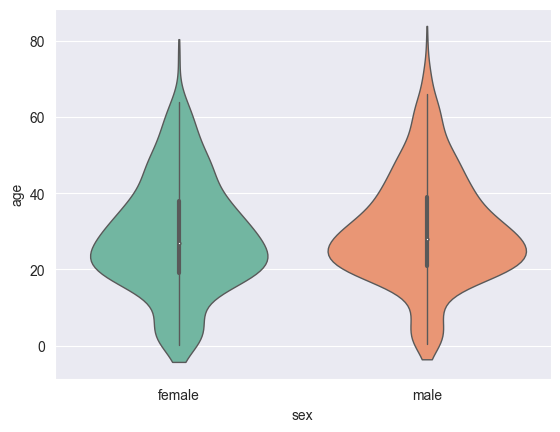

In [28]:
sns.violinplot(data=titanic_df, x='sex', y='age',bw_adjust=.5, cut=1, linewidth=1, palette="Set2")

# Función de probabilidad / distribución

C:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Temp\ipykernel_15944\1915377635.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rndB,kde=True,hist = True)


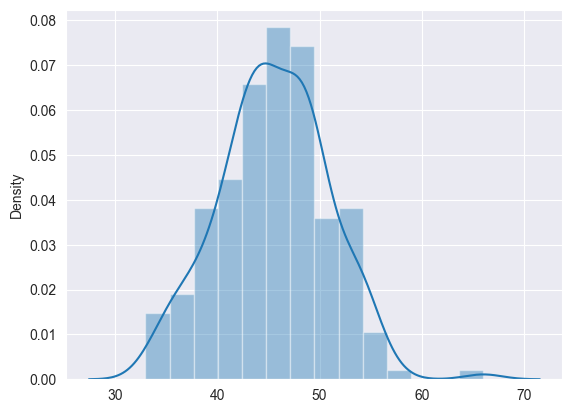

In [38]:
# Dsitribución binomial (discreta)
from numpy import random
#rndB = random.binomial(n=150,p=.3,size = 200) #p es la probabilidad de ocurrencia
#print(rndB)
sns.distplot(rndB,kde=True,hist = True)
plt.show()

La última novela de un autor ha tenido un gran éxito, hasta el punto de que el 80% de los lectores ya la han leído. Un grupo de 4 amigos son aficionados a la lectura:

1 ¿Cuál es la probabilidad de que en el grupo hayan leído la novela 2 personas?

2 Como máximo 2

probabilidad: 0.8 (éxito) n = 4 q = 1-p

P(x=k) = (n,k)p^k*q^n-k

k = 2 p(x=2) = (4,2)(0.8)^2(1-0.8)^(4-2)

In [39]:
from scipy.stats import binom
resultado1 = binom.pmf(k=2,n=4,p=.8)
print("la probabilidad de que 2 personas hayan leido la novela es :",resultado1)

la probabilidad de que 2 personas hayan leido la novela es : 0.1535999999999999


In [40]:
# Como máximo 2 () (P(X <= 2))
# O: UNION DE CONJUNTOS -> +
# Y: INTERSECCIÓN DE CONJUNTOS -> *
# P(X=0) + P(X=1) + P(X=2)

resultado2 = 0
for i in range(3):
    resultado2 += binom.pmf(k=i, n=4, p=0.8)
print("Como máximo 2 personas: ", resultado2)

Como máximo 2 personas:  0.18079999999999988


# Clase 4 - Distribución normal
Temas:

- Distribución normal
- Intervalos de confianza
- Matriz de covarianza

In [41]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [42]:
# distribucion normal de alturas de una parte de la poblacion
mu = 170 # media
sigma = 8 # stdv
n = 100000
alturas = np.random.normal(mu,sigma,n)

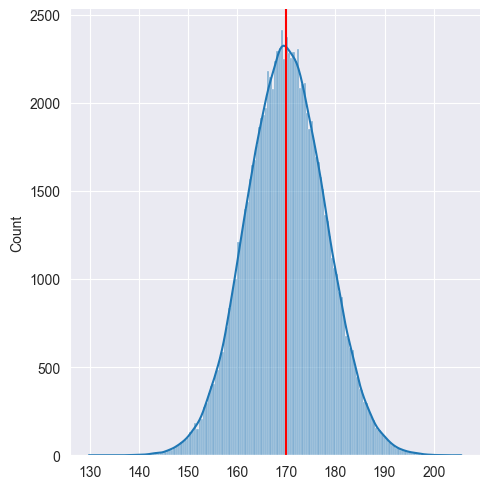

In [50]:
sns.displot(alturas,kde=True) #displo: grafico de distribución
plt.axvline(mu, color ='red')
plt.show()

In [51]:
# Distribución normal estandar

mu1 = 170
sigma1 = 3
mu2 = 180
sigma2 = 8

alturas1 = np.random.normal(mu1,sigma1,100000)
alturas2 = np.random.normal(mu2,sigma2,100000)

max1 = alturas1.max()
max2 = alturas2.max()
min1 = alturas1.min()
min2 = alturas2.min()
print("max1 : ", max1, "max2 : ", max2)
print("min1 : ", min1, "min2 : ", min2)

max1 :  183.85950338615257 max2 :  217.50195900884734
min1 :  155.73429805476428 min2 :  144.5565976982183


In [52]:
df = pd.DataFrame({
    'altura1': alturas1,
    'altura2': alturas2
    })

C:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Temp\ipykernel_15944\3481304670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['altura1'], color= 'purple')
C:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Temp\ipykernel_15944\3481304670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

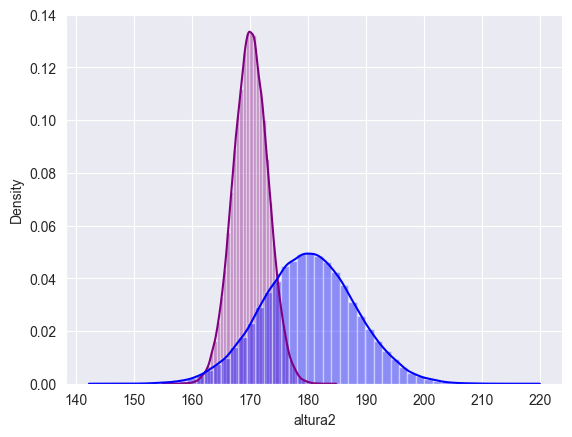

In [56]:
sns.distplot(df['altura1'], color= 'purple')
sns.distplot(df['altura2'], color= 'b')
plt.show()

In [57]:
# Formula de estandarización (permutación z)
# (x-mu)/sigma

import scipy.stats as st

In [59]:
st.norm.cdf(-3.333333)

0.0004290608472901215

NameError: name 'plr' is not defined

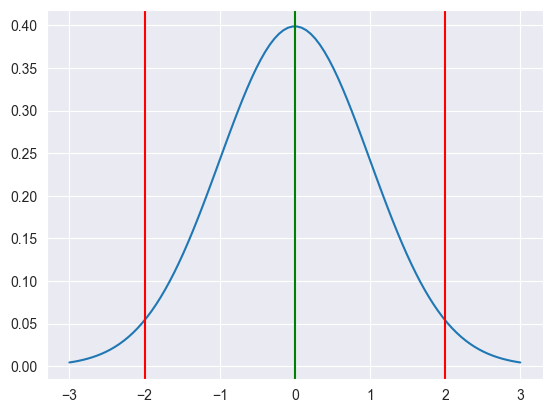

In [60]:
mu = 0
std = 1
x = np.linspace(mu-3*std, mu + 3*std,100)
sns.lineplot(x=x,y=st.norm.pdf(x,mu,std))
plt.axvline(x=-2,color='r')
plt.axvline(x=0,color='g')

plt.axvline(x=2,color='r')
plr.show()

In [61]:
# X: El peso de un estudiante
z64 = (64-70)/3
pmenos64 = st.norm.cdf(z64)
pmenos64

0.0227501319481792

In [62]:
z90 = (90-70)/3
pz90 = st.norm.cdf(z90)
pzmas90 = 1-pz90
pzmas90

1.308397834520747e-11

In [63]:
pmas64 = 1-pmenos64
pmas64

0.9772498680518208

In [64]:
# Intervalos de confianza
# intervalo de confianza 90%
z09 = st.norm.ppf(1-(1-0.9)/2)

z95 = st.norm.ppf(1-(1-0.95)/2)
z99 = st.norm.ppf(1-(1-0.99)/2)

In [9]:
from scipy.stats import norm

# supuestos del curso
mu = 75  # Media
sigma = 15  # Desviación estándar

# probabilidad acumulada P(X > 89) con distirbución normal
prob_acumulada = 1 - norm.cdf(89, mu, sigma) #probabilidad residual
prob_acumulada

0.17532394485222946